#8. Метод ближайших соседей

In [159]:
%matplotlib inline

In [160]:
import numpy as np
import pylab as pl

Сгенерируем выборку из двух двумерных нормальных распределений

In [161]:
n = 100
red = np.random.normal(loc=0, scale=1, size=(n,2))
green = np.random.normal(loc=3, scale=2, size=(n,2))
print green

[[  4.06472850e+00   1.34456516e+00]
 [  2.74890630e+00   4.41917063e+00]
 [ -1.46935920e+00   5.00264149e+00]
 [  5.92177095e+00   2.82527113e+00]
 [ -5.53580908e-01   1.02525284e+00]
 [  1.83154711e+00   3.00107049e+00]
 [  1.61578363e+00   5.07744142e+00]
 [  3.59782973e+00   2.48461439e+00]
 [  5.16393593e+00   2.16566465e+00]
 [  5.96598056e+00   3.64146544e+00]
 [  2.67369222e+00   2.94741297e+00]
 [  2.79436896e+00   1.53705055e+00]
 [  1.50103598e+00   4.02425831e+00]
 [  2.65449242e+00   5.07644039e+00]
 [  4.05500236e+00   2.29084195e+00]
 [  3.37768508e+00  -9.56566796e-02]
 [ -3.78852071e-01   8.47177530e-01]
 [ -5.06965180e-01   9.70186131e-01]
 [  7.06057289e+00   4.62720115e+00]
 [  1.06125362e+00   3.95149802e+00]
 [  3.87057011e+00   1.91425413e+00]
 [  5.95270564e+00   1.93075950e+00]
 [  5.42738635e+00   2.52175993e+00]
 [  3.00401347e+00   6.02174439e+00]
 [  4.14413292e+00   2.82224687e+00]
 [  4.68090057e+00   3.23759706e+00]
 [  4.54952151e+00   6.21454349e+00]
 

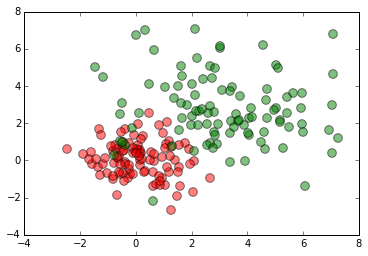

In [162]:
pl.scatter(red[:,0], red[:,1], c='red', s=75, alpha=0.5)
pl.scatter(green[:,0], green[:,1], c='green', s=75, alpha=0.5)

In [163]:
X = np.vstack([red, green])
y = np.hstack([np.zeros(n), np.ones(n)])
print X.shape
print y.shape

(200, 2)
(200,)


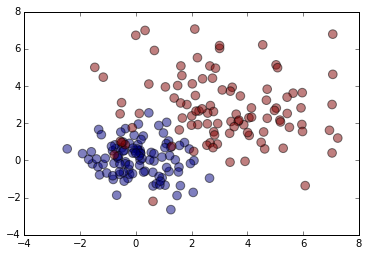

In [164]:
pl.scatter(X[:, 0], X[:, 1], c = y, s = 75, alpha = 0.5)

##Обучение

In [165]:
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=3)
clf.fit(X, y)
print clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')


In [166]:
clf.predict([[0,1.7], [0,4]])

array([ 0.,  1.])

##Качество

In [167]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf.fit(X_train, y_train)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(140, 2)
(60, 2)
(140,)
(60,)


In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.93333333333333335

In [169]:
accs = []
for k in range(1,60):
    accs.append(accuracy_score(y_test, KNN(n_neighbors=k).fit(X_train, y_train).predict(X_test)))

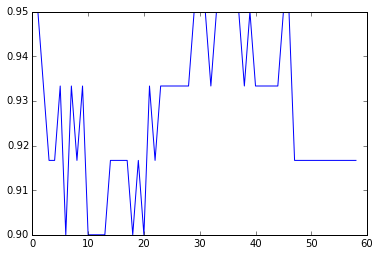

In [170]:
pl.plot(accs)

In [171]:
from sklearn.grid_search import GridSearchCV

params = {'n_neighbors': range(1, 60)}
grid_searcher = GridSearchCV(clf, params, cv = 5)
grid_searcher.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [172]:
mean_acc = np.array([np.mean(el.cv_validation_scores) for el in grid_searcher.grid_scores_])

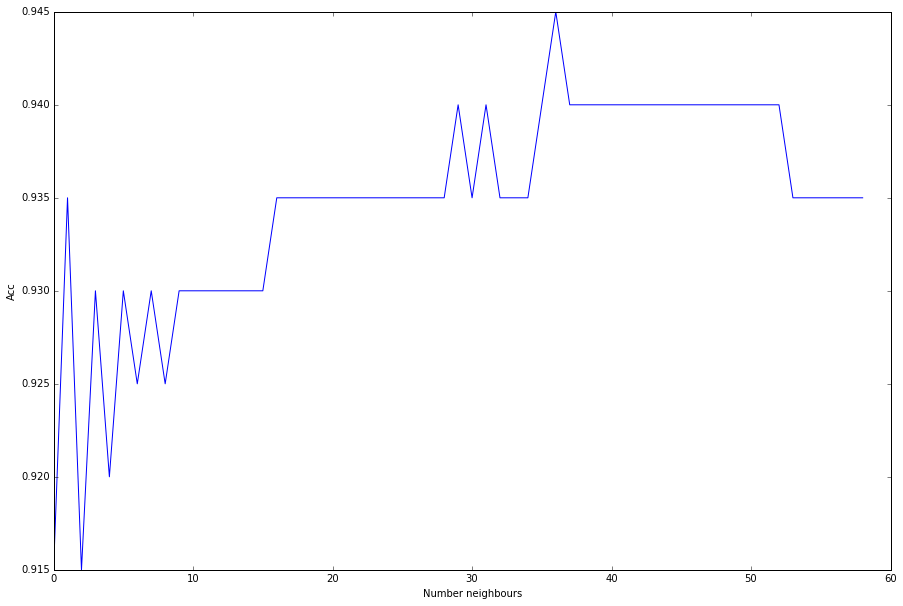

In [173]:
pl.figure(figsize=(15,10))
pl.plot(mean_acc)
pl.xlabel('Number neighbours')
pl.ylabel('Acc')


Берем 36-38